In [41]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
#si ya tiene habilitado la carpeta de gdrive no ejecute este código
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
df_mercadeo = pd.DataFrame()
df_mercadeo = pd.read_csv('/content/gdrive/My Drive/IA/mercadeo_bancario.csv', encoding='utf-8')

In [44]:
df_mercadeo.head(20)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1
5,30,management,divorced,preschool,6,yes,yes,no,499476,75,1,cellular,jul,tue,68,90,0,1553,0
6,37,blue-collar,married,preschool,6,no,yes,no,86520,0,5,cellular,may,thu,204,66,0,442,0
7,39,blue-collar,divorced,tecnical_school,4,no,yes,no,176081,0,1,cellular,may,fri,191,51,0,495,0
8,36,admin.,married,university.degree,6,no,no,no,0,0,3,cellular,jun,mon,174,0,1,1097,1
9,27,blue-collar,single,preschool,3,no,yes,no,323709,0,1,cellular,apr,thu,191,33,1,414,0


In [46]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['trabajo']=label_encoder.fit_transform(df_mercadeo['trabajo'])

In [56]:
df_mercadeo.replace({"divorced":1,"married":2,"unknown":0,"single":3},inplace=True) 
##label_encoder = preprocessing.LabelEncoder()
##df_mercadeo['estado_civil']=label_encoder.fit_transform(df_mercadeo['estado_civil'])


In [47]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['educacion']=label_encoder.fit_transform(df_mercadeo['educacion'])

In [49]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['credito_sin_pago']=label_encoder.fit_transform(df_mercadeo['credito_sin_pago'])

In [50]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['prestamo_vivienda']=label_encoder.fit_transform(df_mercadeo['prestamo_vivienda'])

In [51]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['prestamo_personal']=label_encoder.fit_transform(df_mercadeo['prestamo_personal'])

In [52]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['contacto']=label_encoder.fit_transform(df_mercadeo['contacto'])

In [53]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['contacto']=label_encoder.fit_transform(df_mercadeo['contacto'])

In [54]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['dia_semana']=label_encoder.fit_transform(df_mercadeo['dia_semana'])

In [55]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['mes']=label_encoder.fit_transform(df_mercadeo['mes'])

In [57]:
df_mercadeo.head(20)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,1,2,2,7,1,2,0,268017,0,5,0,1,2,210,43,0,88,0
1,53,9,2,7,1,0,0,0,0,0,0,0,7,0,138,0,0,14,0
2,28,4,3,6,3,0,2,0,308036,0,0,0,4,2,339,27,2,1993,1
3,39,7,2,0,1,0,0,0,0,0,4,0,0,0,185,0,0,1338,0
4,55,5,2,2,2,0,2,0,249888,0,4,0,1,0,137,2,1,1184,1
5,30,4,1,2,6,2,2,0,499476,75,1,0,3,3,68,90,0,1553,0
6,37,1,2,2,6,0,2,0,86520,0,5,0,6,2,204,66,0,442,0
7,39,1,1,5,4,0,2,0,176081,0,1,0,6,0,191,51,0,495,0
8,36,0,2,6,6,0,0,0,0,0,3,0,4,1,174,0,1,1097,1
9,27,1,3,2,3,0,2,0,323709,0,1,0,0,2,191,33,1,414,0


In [58]:
#dimensiones del dataframe
print("matrix df [MxN] ->"+str(df_mercadeo.shape))
#verificamos que no hayan nulos
print("---Columnas con valores nulos--")
print(df_mercadeo.isnull().sum())

matrix df [MxN] ->(41188, 19)
---Columnas con valores nulos--
edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64


In [59]:
from sklearn.tree import DecisionTreeClassifier  

In [60]:
df_mercadeo.describe()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,2.165000,3.679907,3.984680,0.221521,1.071720,0.327425,149706.676751,0.336409,2.497524,0.365252,4.230868,2.004613,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,3.59456,0.611053,2.401197,2.583405,0.432347,0.985314,0.723616,166028.840792,4.478984,1.703683,0.481507,2.320025,1.397575,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,0.00000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,2.00000,2.000000,4.000000,4.000000,0.000000,2.000000,0.000000,81778.500000,0.000000,2.000000,0.000000,4.000000,2.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,7.00000,3.000000,6.000000,6.000000,0.000000,2.000000,0.000000,290938.500000,0.000000,4.000000,1.000000,6.000000,3.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,11.00000,3.000000,7.000000,8.000000,2.000000,2.000000,2.000000,499992.000000,90.000000,5.000000,1.000000,9.000000,4.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


In [61]:
df_mercadeo

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,1,2,2,7,1,2,0,268017,0,5,0,1,2,210,43,0,88,0
1,53,9,2,7,1,0,0,0,0,0,0,0,7,0,138,0,0,14,0
2,28,4,3,6,3,0,2,0,308036,0,0,0,4,2,339,27,2,1993,1
3,39,7,2,0,1,0,0,0,0,0,4,0,0,0,185,0,0,1338,0
4,55,5,2,2,2,0,2,0,249888,0,4,0,1,0,137,2,1,1184,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,2,0,5,1,0,2,280875,0,0,1,4,2,222,33,0,664,0
41184,31,3,2,2,1,1,0,0,0,0,4,1,6,2,196,0,0,736,0
41185,42,0,3,6,1,2,2,2,138636,89,3,1,6,4,62,46,0,43,0
41186,48,9,2,4,4,2,0,2,138176,72,4,1,8,3,200,19,0,1068,0


In [63]:
predictors = df_mercadeo[['trabajo','educacion','total_hijos','credito_sin_pago','prestamo_vivienda','prestamo_personal','valor_prestamo','dias_ultimo_pago','tarjetas_credito','contacto','mes','dia_semana','duracion_ultimo_contacto','dias_ultimo_contacto','anterior_contacto','numero_empleados']]
targets = df_mercadeo.si_no
predictors

,trabajo,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados
0,1,2,7,1,2,0,268017,0,5,0,1,2,210,43,0,88
1,9,7,1,0,0,0,0,0,0,0,7,0,138,0,0,14
2,4,6,3,0,2,0,308036,0,0,0,4,2,339,27,2,1993
3,7,0,1,0,0,0,0,0,4,0,0,0,185,0,0,1338
4,5,2,2,0,2,0,249888,0,4,0,1,0,137,2,1,1184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,0,5,1,0,2,280875,0,0,1,4,2,222,33,0,664
41184,3,2,1,1,0,0,0,0,4,1,6,2,196,0,0,736
41185,0,6,1,2,2,2,138636,89,3,1,6,4,62,46,0,43
41186,9,4,4,2,0,2,138176,72,4,1,8,3,200,19,0,1068


In [74]:
predictors_labels = ['trabajo','educacion','total_hijos','credito_sin_pago','prestamo_vivienda','prestamo_personal','valor_prestamo','dias_ultimo_pago','tarjetas_credito','contacto','mes','dia_semana','duracion_ultimo_contacto','dias_ultimo_contacto','anterior_contacto','numero_empleados']
target_labels = ['si_no']

In [75]:
#dividiremos el dataset en  75% (train) y 25% (test), estos valores estan por defecto
X_train, X_test, Y_train, Y_test = train_test_split(predictors, targets)

In [76]:
arbol_clasi = DecisionTreeClassifier(max_depth = 3, random_state = 2)

In [77]:
arbol_clasi.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [78]:
# Predición para un registro
#tomamos la información del primer registro (X_test)
print(X_test.iloc[0])
# el verdadero resultado de la flor
print(Y_test.iloc[0])
#le pasamos esos datos al algoritmo
arbol_clasi.predict(X_test.iloc[0].values.reshape(1, -1))

#Predicciones para varios (10) registros
arbol_clasi.predict(X_test[0:10])

trabajo                       7
educacion                     0
total_hijos                   4
credito_sin_pago              0
prestamo_vivienda             0
prestamo_personal             0
valor_prestamo                0
dias_ultimo_pago              0
tarjetas_credito              2
contacto                      0
mes                           6
dia_semana                    2
duracion_ultimo_contacto    566
dias_ultimo_contacto          0
anterior_contacto             1
numero_empleados            788
Name: 5735, dtype: int64
0


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [79]:
accuary = arbol_clasi.score(X_test, Y_test)
print(accuary)

0.8970573953578712


In [80]:
#para graficar  Iris-Setosa (0), - Iris-Versicolour (1), - Iris-Virginica (2)
class_names_list=list([target_labels])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol_clasi,feature_names=predictors_labels, impurity = False, filled = True)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

In [81]:
#creamos un dataframe de panda (mejora la visualización/administración de los datos)
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(arbol_clasi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
12,duracion_ultimo_contacto,0.718
14,anterior_contacto,0.148
10,mes,0.106
9,contacto,0.028
0,trabajo,0.000
1,educacion,0.000
2,total_hijos,0.000
3,credito_sin_pago,0.000
4,prestamo_vivienda,0.000
5,prestamo_personal,0.000


In [82]:
#la profundad de un árbol la medimos con max_depth
# creamos una lista con profundidades de 1 a 6 
max_depth_lista = list(range(1, 6))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(X_train, Y_train)
    score = arbol_clasi.score(X_test, Y_test)
    accuracy.append(score)

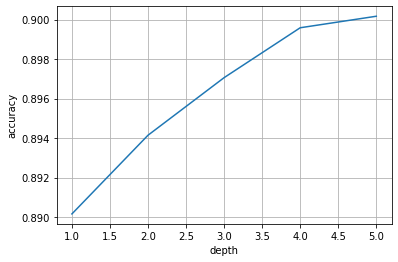

In [83]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()